In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
from sklearn.cluster import KMeans as k
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats as sts

In [2]:
data=pd.read_csv('horse.csv')
print(data.shape)
data.head()

(299, 28)


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
data_out=data['outcome']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

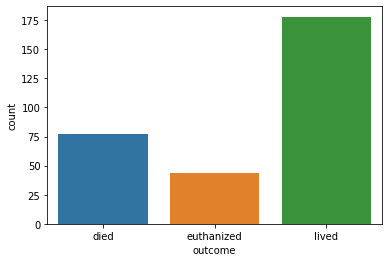

In [5]:
sns.countplot(data.outcome)
plt.show()

## Missing Values

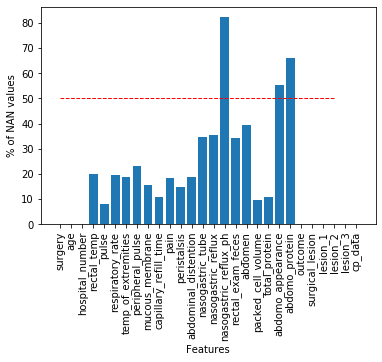

In [6]:
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [50,50], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical')
plt.show()


In [7]:
datnul=data.isnull().sum()/len(data)*100
datnul

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

### Dropping Features with more than 50% missing values and other unrequired features like hospital number.

In [8]:
df = data.drop(['nasogastric_reflux_ph','abdomo_appearance','abdomo_protein','hospital_number'],axis=1)

## Null Values after dropping a few features.

In [9]:
datnul=df.isnull().sum()/len(data)*100
datnul

surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

## Splitting age into 2 different data frames (young/adult) so that imputation can be done on the basis of age.

In [10]:
print("full data shape",data.shape)
data_adult =  df[(df['age'] == 'adult')]
data_young =  df[(df['age'] == 'young')]
print("adult data shape",data_adult.shape)
print("young data shape",data_young.shape)

full data shape (299, 28)
adult data shape (275, 24)
young data shape (24, 24)


## Data Imputation

In [11]:
for i in df.columns:
    print("for ",i," column")
    
    if(df[i].isnull().sum()> 0):
        if(df[i].dtype=='object'):
            
            tpo = data_adult[i].mode()[0]
        
            tpy = data_young[i].mode()[0]
            
            
            
            data_adult[i].fillna(tpo,inplace=True)

            data_young[i].fillna(tpy,inplace=True)
        else:
            
            tpo = data_adult[i].median()
        
            tpy = data_young[i].median()
    
            data_adult[i].fillna(tpo,inplace=True)

            data_young[i].fillna(tpy,inplace=True)

for  surgery  column
for  age  column
for  rectal_temp  column
for  pulse  column
for  respiratory_rate  column
for  temp_of_extremities  column
for  peripheral_pulse  column
for  mucous_membrane  column
for  capillary_refill_time  column
for  pain  column
for  peristalsis  column
for  abdominal_distention  column
for  nasogastric_tube  column
for  nasogastric_reflux  column
for  rectal_exam_feces  column
for  abdomen  column
for  packed_cell_volume  column
for  total_protein  column
for  outcome  column
for  surgical_lesion  column
for  lesion_1  column
for  lesion_2  column
for  lesion_3  column
for  cp_data  column


C:\Users\Dhruv\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Checking for Null values

In [12]:
data_adult.isnull().sum()/len(data)*100

surgery                  0.0
age                      0.0
rectal_temp              0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
peripheral_pulse         0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
nasogastric_tube         0.0
nasogastric_reflux       0.0
rectal_exam_feces        0.0
abdomen                  0.0
packed_cell_volume       0.0
total_protein            0.0
outcome                  0.0
surgical_lesion          0.0
lesion_1                 0.0
lesion_2                 0.0
lesion_3                 0.0
cp_data                  0.0
dtype: float64

In [13]:
data_young.isnull().sum()/len(data)*100

surgery                  0.0
age                      0.0
rectal_temp              0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
peripheral_pulse         0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
nasogastric_tube         0.0
nasogastric_reflux       0.0
rectal_exam_feces        0.0
abdomen                  0.0
packed_cell_volume       0.0
total_protein            0.0
outcome                  0.0
surgical_lesion          0.0
lesion_1                 0.0
lesion_2                 0.0
lesion_3                 0.0
cp_data                  0.0
dtype: float64

## Cleaned Data set

In [14]:
df1 = pd.concat([data_young,data_adult],axis =0)

In [15]:
df1 = df1.sort_index()

In [16]:
df1.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,74.0,7.4,died,no,4300,0,0,no


In [17]:
df2 = df1

## Data Wrangling

In [18]:
cat_cols=list(df1.select_dtypes(include=['object']).columns)
cat_cols

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'outcome',
 'surgical_lesion',
 'cp_data']

In [19]:
num_cols=list(df1.select_dtypes(include=['int64','float64']).columns)
num_cols

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'packed_cell_volume',
 'total_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [20]:
len(cat_cols)

16

In [21]:
len(num_cols)

8

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


for i in cat_cols:
    df1[i] = le.fit_transform(df1[i])

In [23]:
df1.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,38.5,66.0,28.0,1,3,3,2,2,0,2,2,2,1,0,45.0,8.4,0,0,11300,0,0,0
1,1,0,39.2,88.0,20.0,1,2,4,1,3,0,3,2,2,0,4,50.0,85.0,1,0,2208,0,0,0
2,0,0,38.3,40.0,24.0,2,2,5,1,3,2,1,2,2,3,3,33.0,6.7,2,0,0,0,0,1
3,1,1,39.1,164.0,84.0,0,2,2,2,1,0,2,0,0,1,3,48.0,7.2,0,1,2208,0,0,1
4,0,0,37.3,104.0,35.0,1,2,2,2,3,2,1,2,2,0,0,74.0,7.4,0,0,4300,0,0,0


Correlation of mentioned features wrt outcome in ascending order
outcome                  1.000000
packed_cell_volume       0.394881
surgical_lesion          0.332933
pulse                    0.332485
temp_of_extremities      0.290367
total_protein            0.266334
capillary_refill_time    0.256294
surgery                  0.189222
nasogastric_reflux       0.181422
rectal_exam_feces        0.173379
peripheral_pulse         0.171252
abdomen                  0.167236
peristalsis              0.165844
pain                     0.164986
abdominal_distention     0.106343
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
cp_data                  0.078066
respiratory_rate         0.067992
lesion_3                 0.044631
mucous_membrane          0.044373
nasogastric_tube         0.032861
rectal_temp              0.020041
Name: outcome, dtype: float64


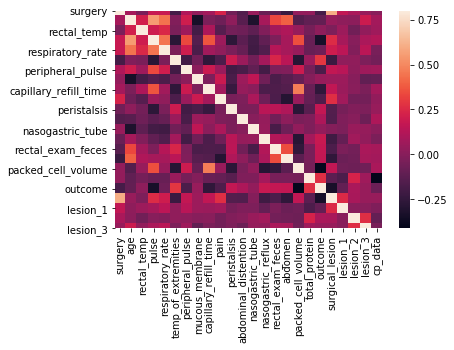

<Figure size 2160x1440 with 0 Axes>

In [24]:
train_corr=df1.corr()
sns.heatmap(train_corr, vmax=0.8)
corr_values=train_corr['outcome'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlation of mentioned features wrt outcome in ascending order")
print(abs(corr_values).sort_values(ascending=False))
plt.figure(figsize = (30,20))
plt.show()

### Removing Features with corr < 0.10 

In [25]:
print("Data Size Before Correlated Column Removal :",df1.shape)

for col in range(len(corr_values)):
        if abs(corr_values[col]) < 0.1:
            df1=df1.drop([corr_values.index[col]], axis=1)
            print(corr_values.index[col],"removed")
print("Data Size After Correlated Column Removal :",df1.shape)

Data Size Before Correlated Column Removal : (299, 24)
lesion_2 removed
cp_data removed
respiratory_rate removed
lesion_3 removed
mucous_membrane removed
nasogastric_tube removed
rectal_temp removed
Data Size After Correlated Column Removal : (299, 17)


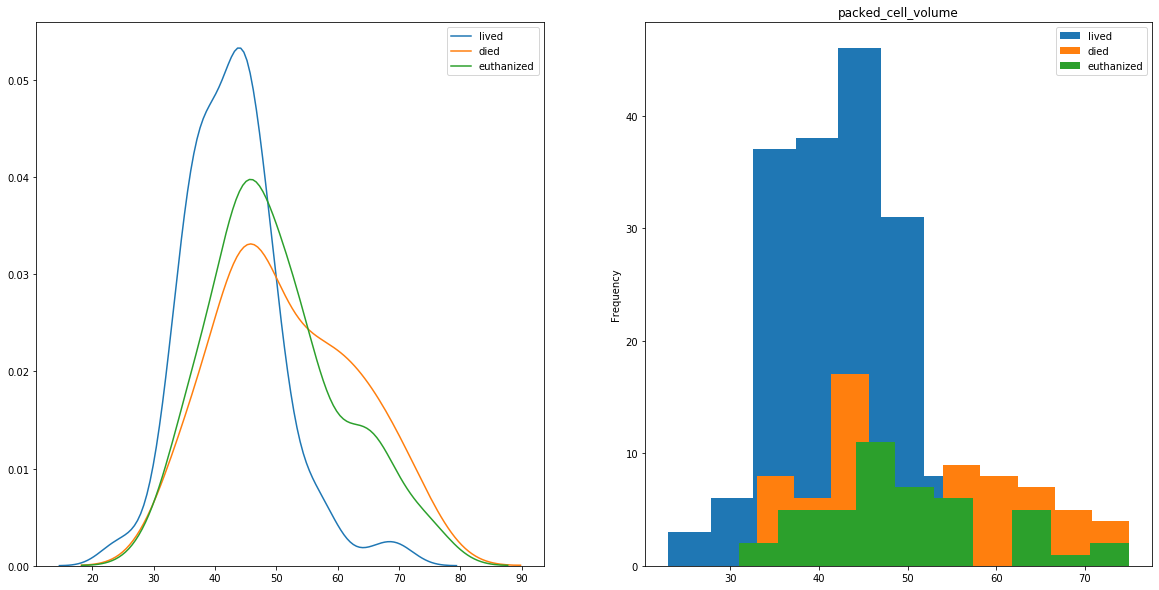

In [26]:
#packed_cell_volume 
outcome = df1.outcome
col='packed_cell_volume'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[20,10])

y=df1[col][outcome==2]
#x=df1['outcome'][target==2]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=df1[col][outcome==0]
# x=df1['outcome'][target==0]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=df1[col][outcome==1]
# x=df1['outcome'][target==1]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

### The plots show that packed cell volume after approx 50, outcome is most likely to be euthanized, and after 60, it is likely to be dead.

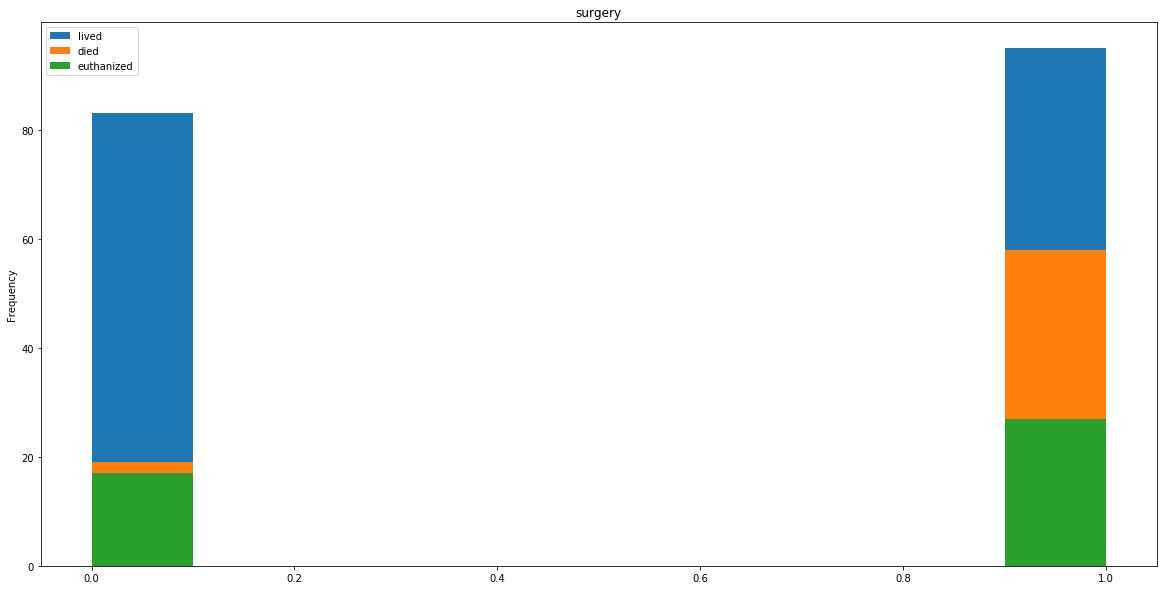

In [27]:
col='surgery'
target = df1.outcome
fig,(ax1)=plt.subplots(1,1, figsize=[20,10])
y=df1[col][target==2]
x=df1['outcome'][target==2]
y.plot.hist(ax=ax1)
y=df1[col][target==0]
x=df1['outcome'][target==0]
y.plot.hist(ax=ax1)
y=df1[col][target==1]
x=df1['outcome'][target==1]
y.plot.hist(ax=ax1)
plt.title(col)
ax1.legend(['lived','died','euthanized'])
plt.show()

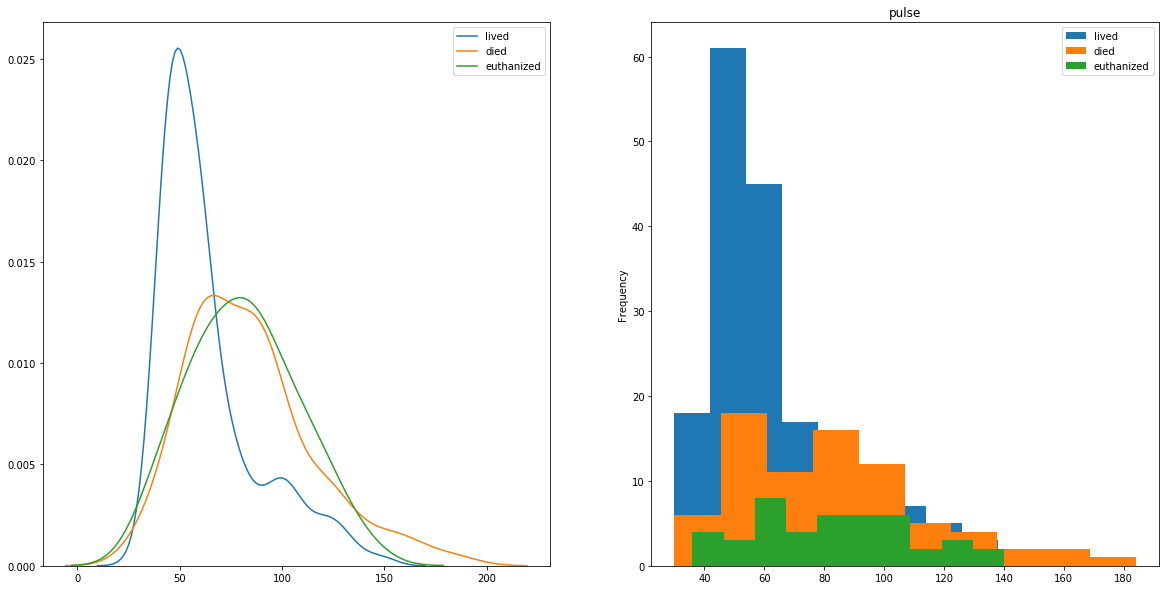

In [28]:
#packed_cell_volume 
outcome = df1.outcome
col='pulse'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[20,10])

y=df1[col][outcome==2]
#x=df1['outcome'][target==2]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=df1[col][outcome==0]
# x=df1['outcome'][target==0]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=df1[col][outcome==1]
# x=df1['outcome'][target==1]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

### This plot tells us that pulse rate above 140 is very bad for a horse, because it can cause death.

## Base Model

In [29]:
y = df2.outcome
X = df2.drop('outcome',axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
print('accuracy score of base model:',accuracy_score(y_test,y_pred))

accuracy score of base model: 0.7111111111111111


In [32]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier

## Supervised Learning Models

In [33]:

y = df1.outcome
X = df1.drop('outcome',axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1),
        'KNN':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB(),
        'Bagging':BaggingClassifier(n_estimators=10,random_state=1),
        'ADA Booster':AdaBoostClassifier(n_estimators=100,random_state=1),
        'Gradient Boost':GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=1),
        'XG Boost':XGBClassifier()}

In [35]:
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Acurracy of train ' + k + ' is {0:.2f}'.format(model.score(X_train, y_train)*100))
    print('Acurracy of test ' + k + ' is {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
    

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Acurracy of train Logistic Regression is 72.25
Acurracy of test Logistic Regression is 73.33
Acurracy of train Decision Tree is 100.00
Acurracy of test Decision Tree is 65.56
Acurracy of train Random Forest is 100.00
Acurracy of test Random Forest is 73.33
Acurracy of train KNN is 76.56
Acurracy of test KNN is 63.33
Acurracy of train Naive Bayes is 64.11
Acurracy of test Naive Bayes is 70.00
Acurracy of train Bagging is 97.61
Acurracy of test Bagging is 75.56
Acurracy of train ADA Booster is 78.95
Acurracy of test ADA Booster is 65.56
Acurracy of train Gradient Boost is 86.12
Acurracy of test Gradient Boost is 72.22
Acurracy of train XG Boost is 97.13
Acurracy of test XG Boost is 74.44


## Logistic Regression is giving the highest accuracy amongst all the Supervised Learning Algorithms.

## Unsupervised Learning Models

### K Means

In [36]:
from sklearn.cluster import KMeans

y=df1['outcome']
X=df1.drop('outcome',axis=1)

kmeans=KMeans(n_clusters=3) # K Value
model=kmeans.fit(X)

In [37]:
y_kmean=model.labels_

In [38]:
print('Accuracy score:',accuracy_score(y,y_kmean)*100)

Accuracy score: 25.75250836120401


### Hierarchical 

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [41]:
y_pred =model.fit_predict(X)

In [42]:
print('Accuracy score:',accuracy_score(y,y_pred)*100)

Accuracy score: 24.08026755852843


### PCA

#### PCA without scaling

In [43]:
y=df1['outcome']
X=df1.drop('outcome',axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

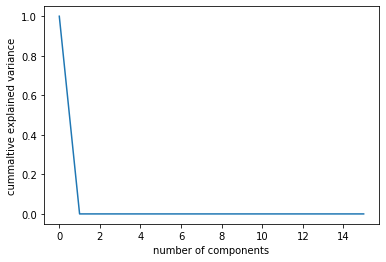

In [45]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cummaltive explained variance')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [47]:
model = RandomForestClassifier(random_state=1,n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)*100

65.55555555555556

#### PCA with scaling

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

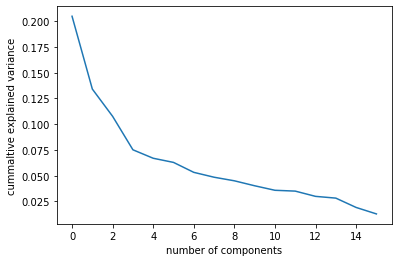

In [51]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cummaltive explained variance')
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
model = RandomForestClassifier(random_state=1,n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.7111111111111111

### Inference: Logistic Regression gave the highest accuracy of 73.33%.

### Using Random Forest We can further fine tune this model to increase accuracy. Pruning and feature selection techniques can be used.

### PCA with scaling gave 71.11% accuracy which is good as well compared to others.

### This model can be beneficial for ranch owners to know their horses better.